In [1]:
'''
Build a model which predicts price based on different features given in cars.csv dataset. And then perform Regularization with 
necessary hyperparameters tuning for a better performing model.
'''

'\nBuild a model which predicts price based on different features given in cars.csv dataset. And then perform Regularization with \nnecessary hyperparameters tuning for a better performing model.\n'

# EDA and Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("cars.csv")
data

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [4]:
data.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.2+ KB


In [6]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [7]:
data["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [8]:
data["normalized-losses"].replace("?",np.nan, inplace = True)

In [9]:
data["normalized-losses"].isnull().sum()

41

In [10]:
data["normalized-losses"].value_counts()

161    11
91      8
150     7
128     6
134     6
104     6
95      5
102     5
103     5
74      5
85      5
168     5
94      5
65      5
106     4
122     4
148     4
118     4
93      4
101     3
125     3
137     3
154     3
83      3
115     3
119     2
87      2
194     2
197     2
108     2
89      2
164     2
158     2
145     2
192     2
188     2
81      2
110     2
113     2
129     2
153     2
107     1
78      1
186     1
231     1
77      1
98      1
121     1
90      1
142     1
256     1
Name: normalized-losses, dtype: int64

In [11]:
data["normalized-losses"] = data["normalized-losses"].astype(float)

In [12]:
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [13]:
data_mean = data["normalized-losses"].mean()
data["normalized-losses"].replace(np.nan, data_mean, inplace = True)

In [14]:
data["normalized-losses"].isnull().sum()

0

In [15]:
data

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [16]:
data["horsepower"].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
?       2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: horsepower, dtype: int64

In [17]:
data["horsepower"].replace("?", np.nan, inplace = True)

In [18]:
data = data.dropna()

In [19]:
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [20]:
data["horsepower"] = data["horsepower"].astype(float)

In [21]:
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

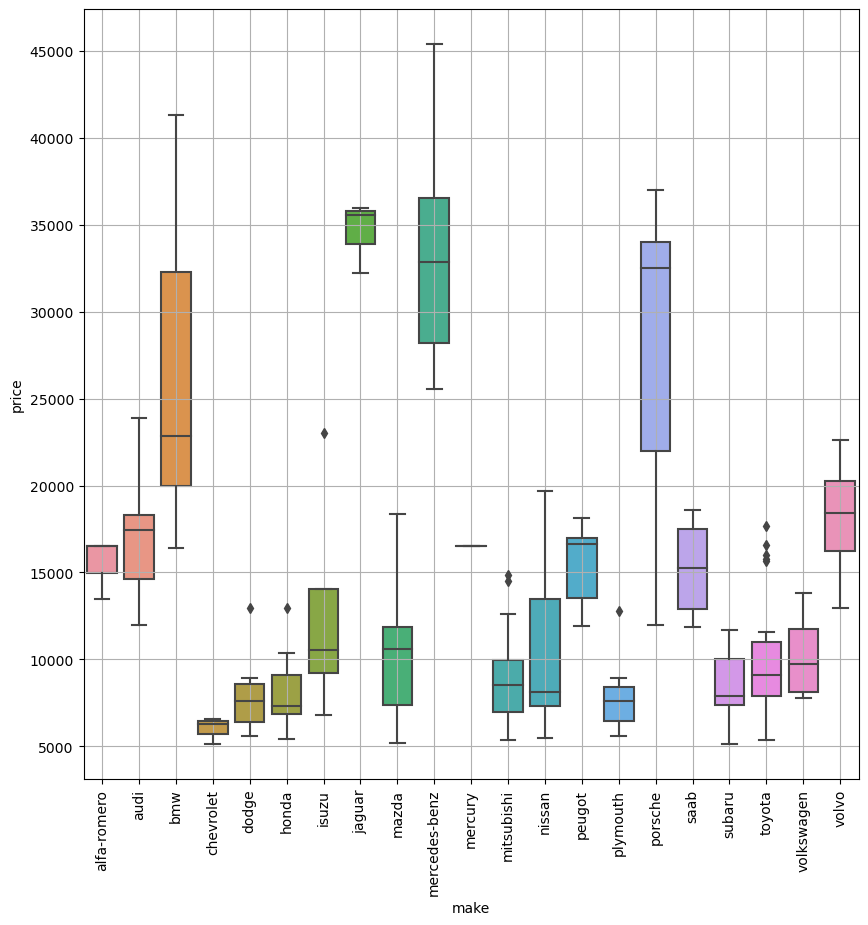

In [22]:
plt.figure(figsize = (10,10))
sns.boxplot(data = data , x = "make", y = "price")
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [23]:
data[(data["make"] == "dodge") & (data["price"] >= 12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964


In [24]:
data.drop(29, inplace = True)

In [25]:
data[(data["make"] == "honda") & (data["price"] >= 12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28,12945


In [26]:
data.drop(41, inplace = True)

In [27]:
data[(data["make"] == "isuzu") & (data["price"] >= 23000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [28]:
data.drop(45, inplace = True)

In [29]:
data[(data["make"] == "mitsubishi") & (data["price"] >= 14000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14869
84,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14489


In [30]:
data.drop(index = [83,84], inplace = True)

In [31]:
data[(data["make"] == "plymouth") & (data["price"] >= 12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [32]:
data.drop(124, inplace = True)

In [33]:
data[(data["make"] == "toyota") & (data["price"] >= 15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


In [34]:
data.drop(index = [172, 178, 179, 180, 181], inplace = True)

In [35]:
data_cat = data.select_dtypes(["object"])
data_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


In [36]:
data_num = data.select_dtypes(["int","float"])
data_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


# Encoding (Label Encoding)

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
for col in data_cat:
    data_cat[col] = le.fit_transform(data_cat[col])
data_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,20,1,3,2,0,3
201,20,1,3,2,0,3
202,20,1,3,2,0,5
203,20,0,3,2,0,3


In [39]:
data_new = pd.concat([data_cat, data_num], axis = 1)
data_new

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,20,1,3,2,0,3,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,20,1,3,2,0,3,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,20,1,3,2,0,5,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,20,0,3,2,0,3,-1,95.0,68.9,55.5,145,106.0,26,27,22470


# Seperation of x and y.

In [40]:
x = data_new.iloc[:,:-1]
x

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg
0,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27
1,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27
2,0,1,2,2,0,5,1,122.0,65.5,52.4,152,154.0,19,26
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,20,1,3,2,0,3,-1,95.0,68.9,55.5,141,114.0,23,28
201,20,1,3,2,0,3,-1,95.0,68.8,55.5,141,160.0,19,25
202,20,1,3,2,0,5,-1,95.0,68.9,55.5,173,134.0,18,23
203,20,0,3,2,0,3,-1,95.0,68.9,55.5,145,106.0,26,27


In [41]:
y = data_new.iloc[:,-1]
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 192, dtype: int64

# Model Preparation

In [42]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state = 1) 

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
ypred

array([30360.54926131, 29863.90130056, 14447.23720294,  9907.35656804,
       15748.70099152, 13152.66791332, 33346.49144911, 10797.7971487 ,
       16302.58216873, 10031.84104393,  9715.87349754, 13058.53531023,
        3551.99379873, 25277.25045918, 16296.85103277, 24876.92615667,
       14270.91803034,  7362.85724566,  5387.60049914,  8311.53409464,
        9350.22179708, 16152.44500545, 20247.26553925, 15843.62204   ,
       12704.87493632, 16328.6609878 ,  3664.70694979,  9667.19558921,
       10002.66665023,  7188.70460854, 24219.46295959, 16547.76738758,
       12704.87493632,  7562.16150749, 15378.54037285, 21467.60516767,
       10712.56883929,  6016.39067301, 10337.05368753, 17557.90874131,
        4454.88299143,  7745.38776991, 10796.623747  ,  8722.74897394,
        8344.40734894,  9689.53806589, 14515.72865205, 12951.1733884 ,
       10460.7120466 , 16793.83022724,  5453.14334593, 28103.98286158,
       16488.20883802,  4891.87087497,  7439.81365495,  9635.21264376,
      

In [50]:
train = lr.score(xtrain, ytrain)
test = lr.score(xtest, ytest)
print(f"Training Accuracy is {train}")
print(f"Testing Accuracy is {test}")

Training Accuracy is 0.8745157797055005
Testing Accuracy is 0.8312182298892613


# Regularization

In [45]:
from sklearn.linear_model import Ridge, Lasso

# L2 Regularization (RIDGE = Regularization Regression)

In [46]:
for i in range(1,5):
    l2 = Ridge(alpha = i)
    l2.fit(xtrain, ytrain)
    test = l2.score(xtest, ytest)
    print(f"For Value of Lambda {i} Testing Accuracy is {test}")

For Value of Lambda 1 Testing Accuracy is 0.8220714144741089
For Value of Lambda 2 Testing Accuracy is 0.8156829364419174
For Value of Lambda 3 Testing Accuracy is 0.8113515546024258
For Value of Lambda 4 Testing Accuracy is 0.8081888988557421


In [47]:
l2 = Ridge(alpha = 1)
l2.fit(xtrain, ytrain)
train = l2.score(xtrain, ytrain)
test  = l2.score(xtest, ytest)
print(f"Training Accuracy is {train}")
print(f"Testing Accuracy is {test}")

Training Accuracy is 0.8689061130198313
Testing Accuracy is 0.8220714144741089


# Final Prediction

In [55]:
ypred = l2.predict(xtest)
ypred # Price Prediction becomes precise after hypertunning Lambda parameter through Ridge Regularization method.

array([30217.62640929, 30076.869076  , 14794.16664766, 10001.20538737,
       15793.2869264 , 13039.11064138, 29525.9523442 , 10640.04709004,
       15721.62929052,  9644.54938816,  9933.39068994, 13344.18614291,
        3392.35812671, 25783.13175898, 15711.03435211, 24478.77749869,
       14385.01026057,  7318.64273398,  5202.14989163,  8122.55478177,
        9165.87975156, 16033.21507996, 20842.31298127, 15536.88067919,
       12468.34687667, 15727.30992928,  3691.03215524,  9761.69364586,
       10116.96970639,  7563.32728147, 24214.78175196, 16654.70131208,
       12468.34687667,  7569.75826724, 15858.9044395 , 21612.10564425,
       10500.5145409 ,  6019.48679888, 10168.78784099, 17310.36138785,
        4300.77094056,  8018.05797718, 10617.20798645,  8605.39110663,
        8301.56706439,  9839.46667577, 14941.26495885, 12677.02783476,
       10277.02642156, 16708.43531367,  5335.10764526, 28234.38626798,
       16496.74056209,  4658.65866205,  7495.93090687,  9977.01087423,
      

In [59]:
pred = l2.predict(xtest)[0]
print(f"The price prediction for given data is {pred}")

The price prediction for given data is 30217.626409287222
